In [29]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from pandas import plotting
from sklearn.model_selection import train_test_split
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [32]:
#loading dataset
iris = pd.read_csv("IRIS.csv")

In [33]:
#printing how many features?
print("the dataset has {} rows and {} features".format(iris.shape[0],iris.shape[1]))

the dataset has 150 rows and 5 features


In [35]:
#visualising data
table = ff.create_table(iris.head(10))
py.iplot(table,filename='jupyter-table1')

In [41]:
#printing info about dataset
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


**The data types are correct and we can see that there is no null values in the dataset**

In [42]:
#printing statistics about the dataset
py.iplot(ff.create_table(iris.describe()),filename='describe_table')

In [43]:
#printing coefficient of Quartile deviation
qd = pd.DataFrame((iris.describe().loc['75%']-iris.describe().loc['25%'])/(iris.describe().loc['75%']+iris.describe().loc['25%']),columns=['COQD'])
print(qd)

                  COQD
sepal_length  0.113043
sepal_width   0.081967
petal_length  0.522388
petal_width   0.714286


In [44]:
#how many datapoints for each class are presents?
print(iris["species"].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [45]:
#which categories of flowers we have?
print(" we have {} types of species in this dataset".format(iris.species.nunique()))
print("the names of this species are:",iris.species.unique())

 we have 3 types of species in this dataset
the names of this species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


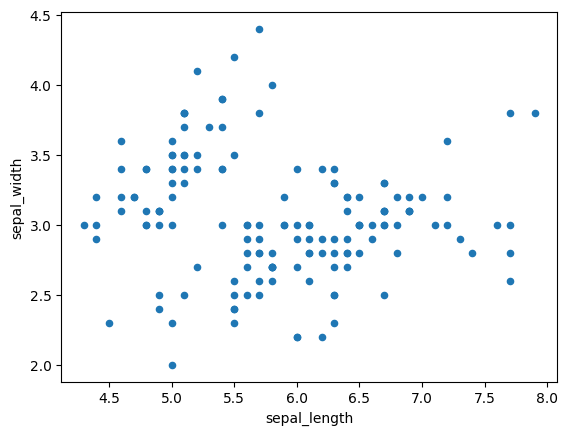

In [46]:
#2-D scatter plots
iris.plot(kind='scatter', x='sepal_length', y='sepal_width') 
plt.show()

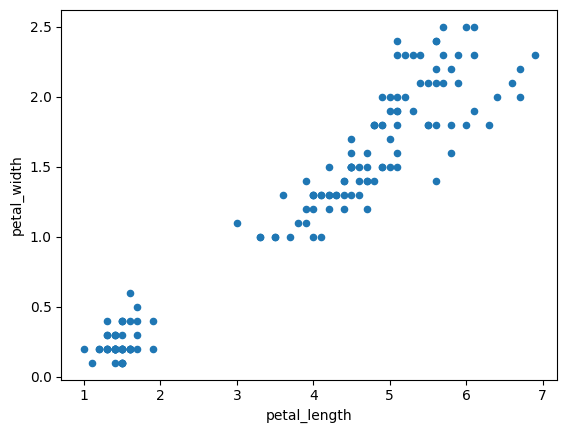

In [47]:
iris.plot(kind='scatter', x='petal_length', y='petal_width') 
plt.show()

* cannot make much sense out it.
* What if we color the points by thier class-label/flower-type.

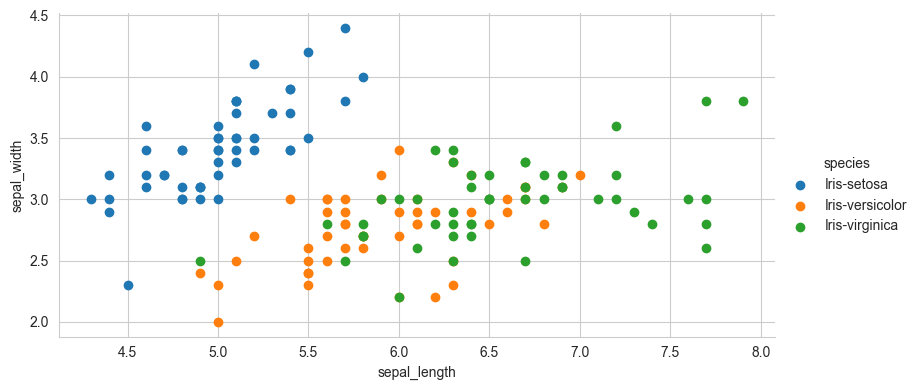

In [49]:
# 2-D Scatter plot with color-coding for each flower type/class.
sns.set_style("whitegrid")
sns.FacetGrid(data=iris,hue="species",height=4, aspect=2)\
   .map(plt.scatter,"sepal_length","sepal_width")\
   .add_legend()
plt.show()

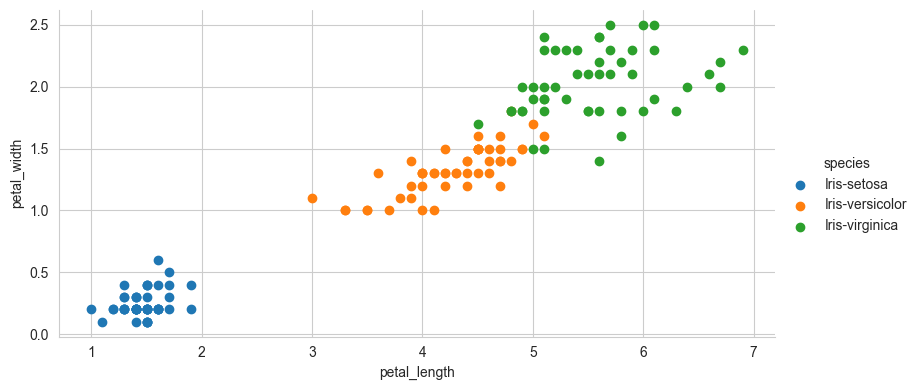

In [50]:
sns.set_style("whitegrid")
sns.FacetGrid(data=iris,hue="species",height=4, aspect=2)\
   .map(plt.scatter,"petal_length","petal_width")\
   .add_legend()
plt.show()

* Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
* Seperating Versicolor from Viginica is much harder as they have considerable overlap.

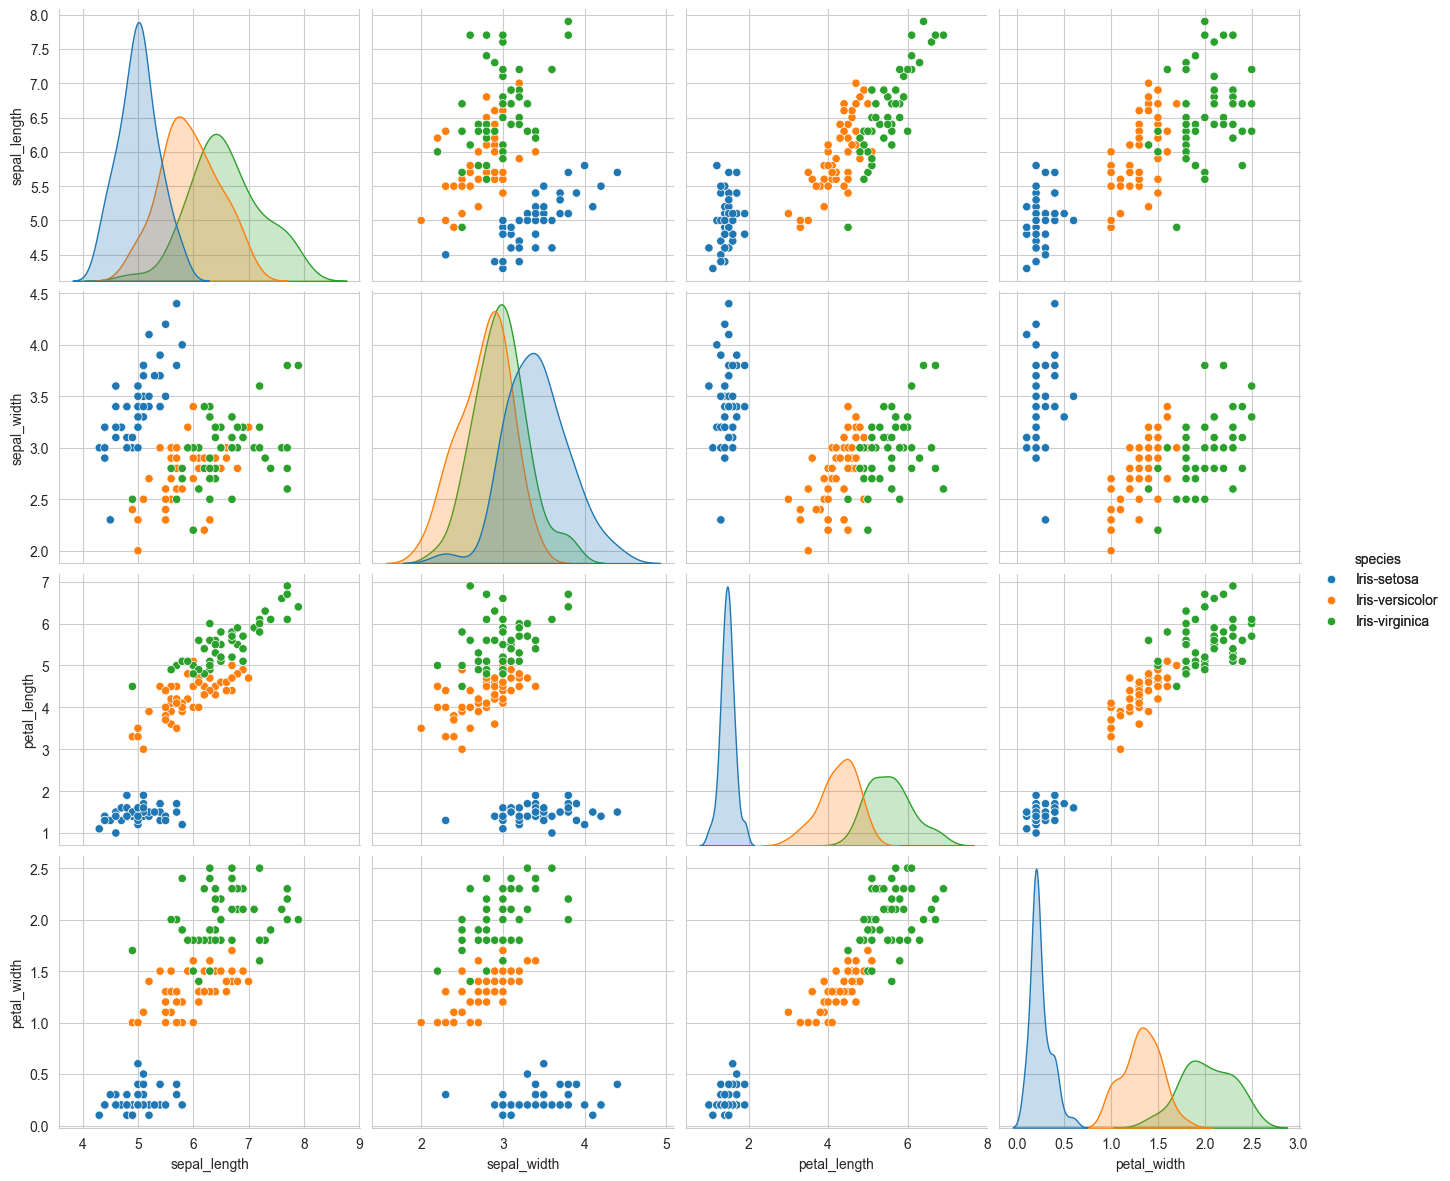

In [51]:
#pair-plot
sns.set_style("whitegrid")
sns.pairplot(data=iris,hue="species",size=3)\
   .add_legend()
plt.show()

* petal_length and petal_width are the most useful features to identify various flower types.
* While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
* We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

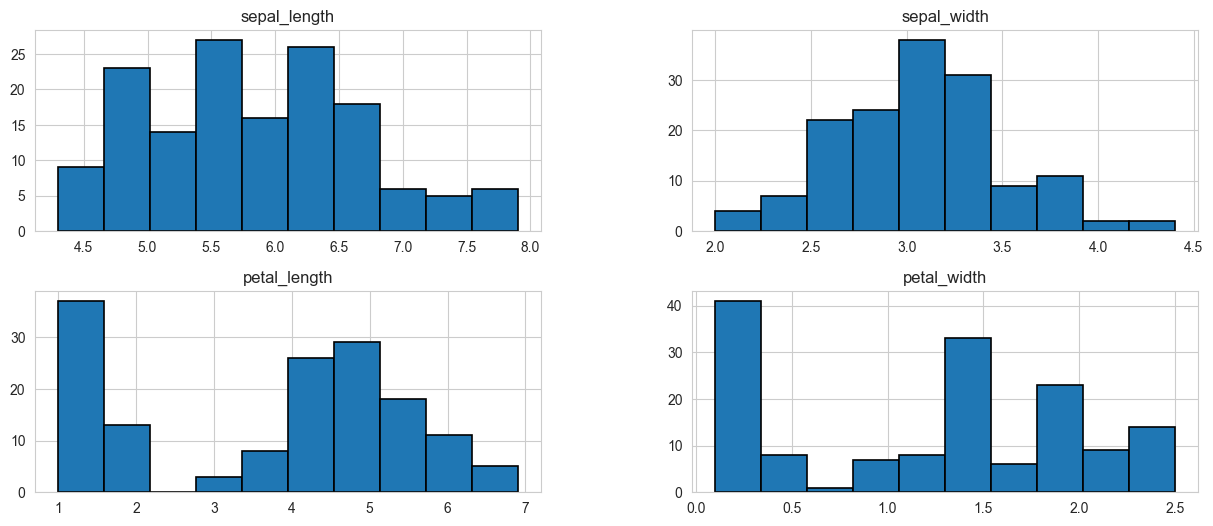

In [52]:
#histograms
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

<Axes: >

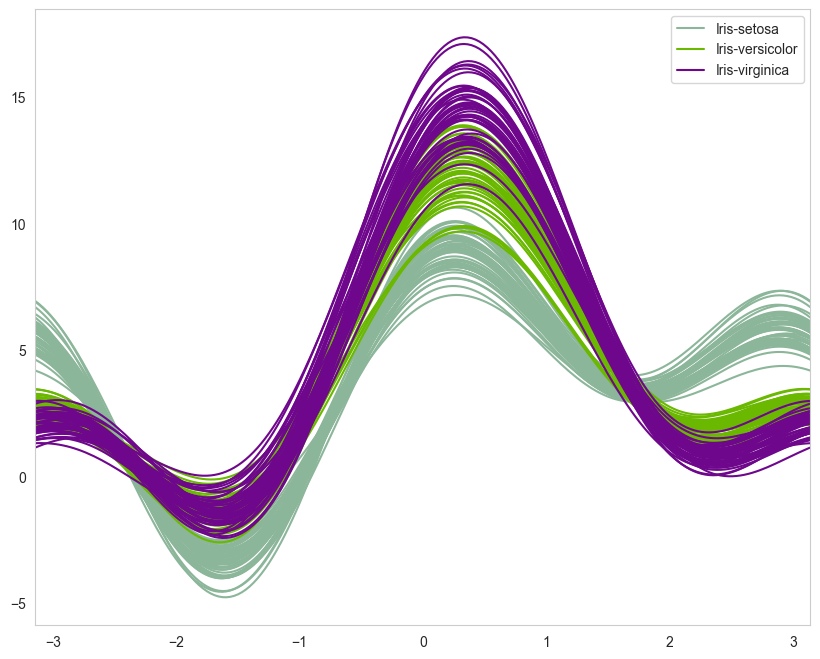

In [53]:
#Andrews curves are a method for visualizing multidimensional data by mapping each observation onto a function.
#https://glowingpython.blogspot.com/2014/10/andrews-curves.html
plt.figure(figsize=(10,8))
plotting.andrews_curves(iris,'species')
#In the plot below, the each color used represents a class
#we can easily note that the lines that represent samples from the same class have similar curves.

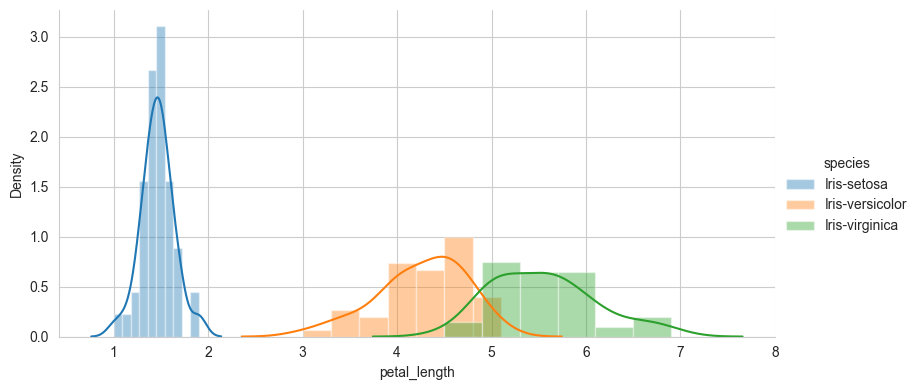

<Figure size 10000x5000 with 0 Axes>

In [54]:
#distplot
sns.FacetGrid(data=iris, hue="species",height=4, aspect=2) \
   .map(sns.distplot, "petal_length") \
   .add_legend()
plt.figure(figsize=(100,50))
plt.show()


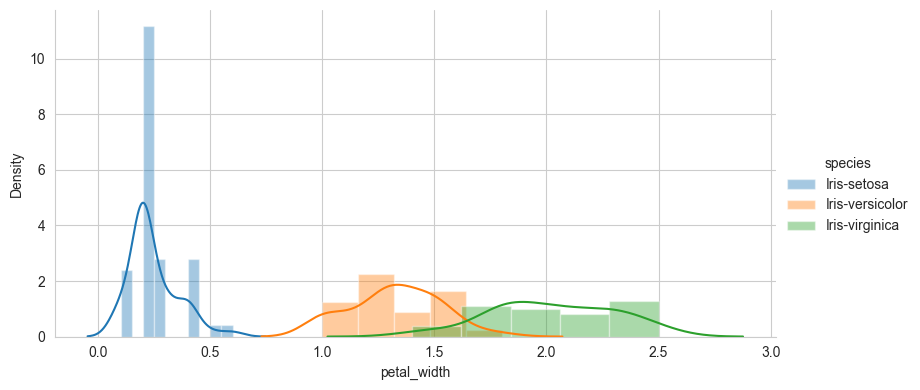

In [55]:
sns.FacetGrid(data=iris, hue="species",height=4, aspect=2) \
   .map(sns.distplot, "petal_width") \
   .add_legend()
plt.show()

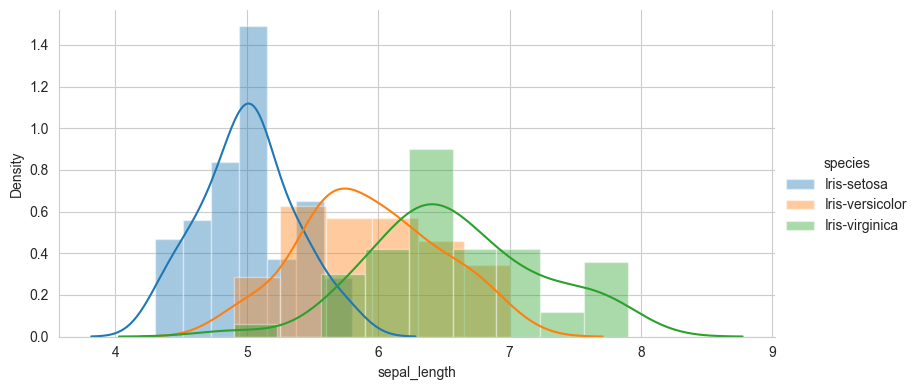

In [56]:
sns.FacetGrid(data=iris, hue="species", height=4, aspect=2) \
   .map(sns.distplot, "sepal_length") \
   .add_legend()
plt.show()

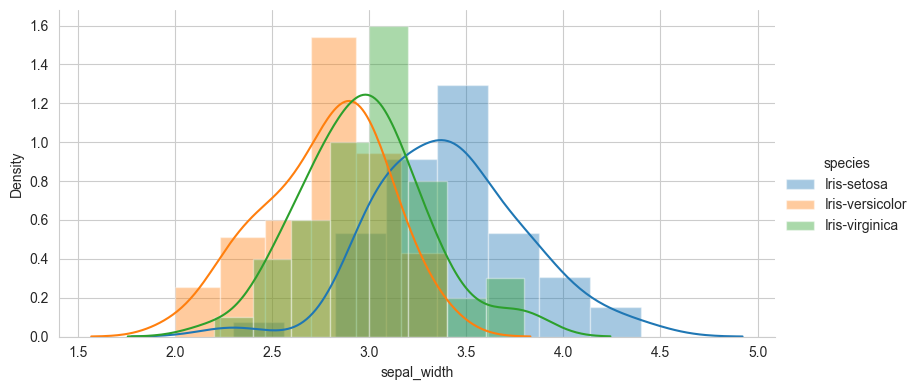

In [57]:
sns.FacetGrid(data=iris, hue="species", height=4, aspect=2) \
   .map(sns.distplot, "sepal_width") \
   .add_legend()
plt.show()

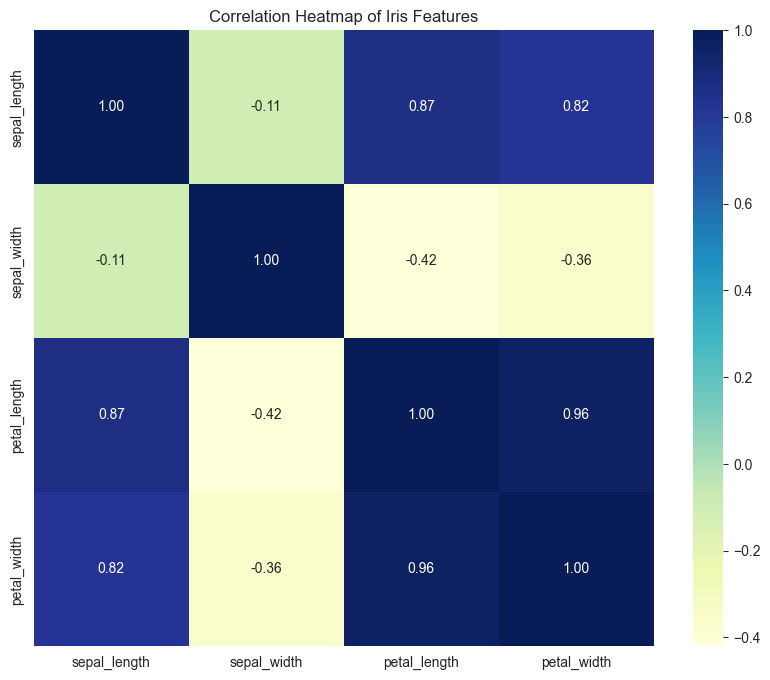

In [59]:
#Let's check if we have any correlation between features
numeric_iris = iris.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(10, 8))  # You had (50, 40), which is too large
sns.heatmap(numeric_iris.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


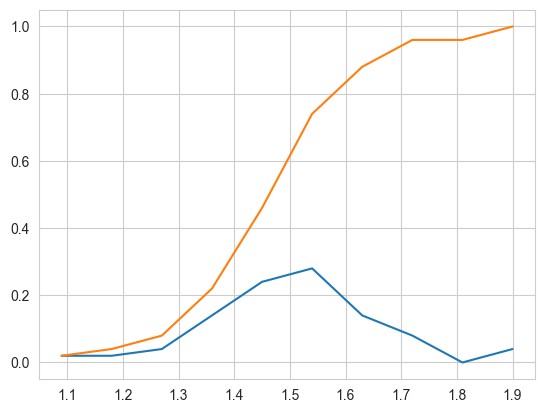

In [60]:
#Plot CDF of petal_length

iris_setosa = iris[iris['species']=='Iris-setosa']
print(iris_setosa.head())
counts, bin_edges= np.histogram(iris_setosa['petal_length'],bins=10, density= True)
pdf=counts/(sum(counts))
print(pdf)

print(bin_edges)

cdf=np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[0.12 0.   0.56 0.14 0.   0.   0.14 0.   0.02 0.02]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]
[0.12 0.12 0.68 0.82 0.82 0.82 0.96 0.96 0.98 1.  ]


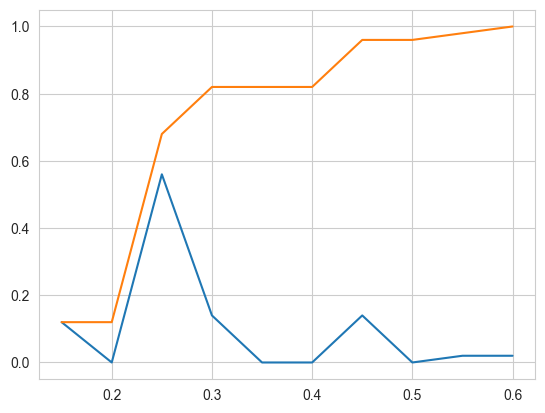

In [61]:
#Plot CDF of petal_width

iris_setosa = iris[iris['species']=='Iris-setosa']
print(iris_setosa.head())
counts, bin_edges= np.histogram(iris_setosa['petal_width'],bins=10, density= True)
pdf=counts/(sum(counts))
print(pdf)

print(bin_edges)

cdf=np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

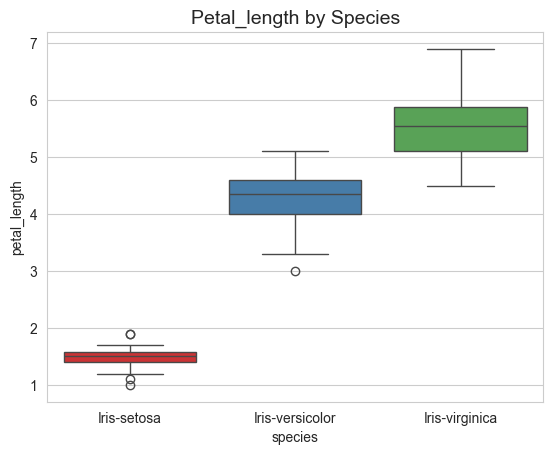

In [62]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='species',y='petal_length', data=iris, palette='Set1')
plt.title("Petal_length by Species", fontsize=14)
plt.show()

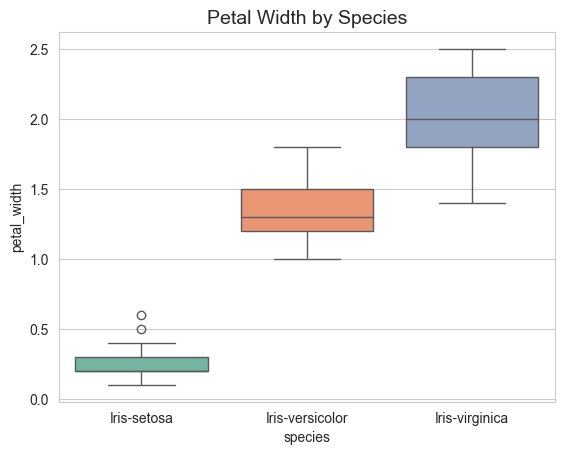

In [63]:
sns.boxplot(x='species',y='petal_width', data=iris, palette='Set2')
plt.title("Petal Width by Species", fontsize=14)
plt.show()

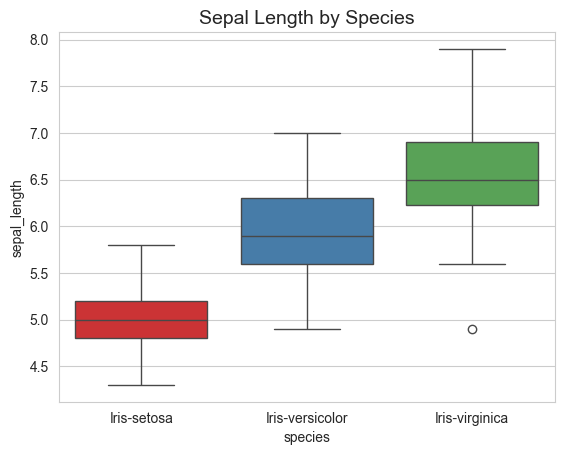

In [64]:
sns.boxplot(x='species',y='sepal_length', data=iris,palette='Set1')
plt.title("Sepal Length by Species", fontsize=14)
plt.show()

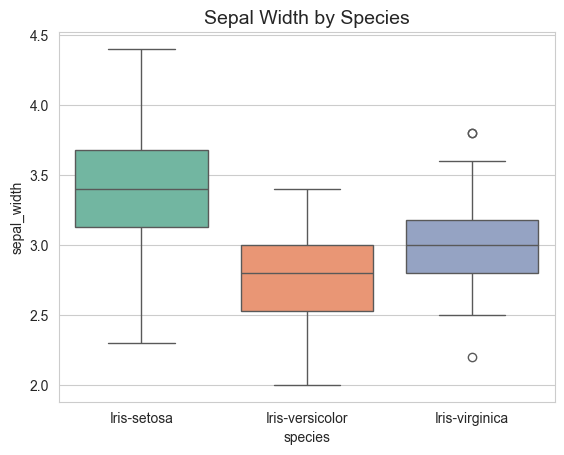

In [65]:
sns.boxplot(x='species', y='sepal_width', data=iris, palette='Set2')  # or 'pastel', 'Set1', etc.
plt.title("Sepal Width by Species", fontsize=14)
plt.show()

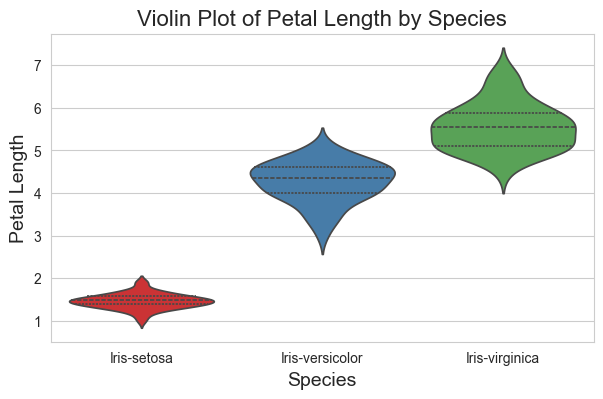

In [66]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot
plt.figure(figsize=(7, 4))  # 👈 Set width=12 inches, height=8 inches
sns.violinplot(x="species", y="petal_length", data=iris, palette="Set1", inner="quartile")
plt.title("Violin Plot of Petal Length by Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Length", fontsize=14)
plt.show()

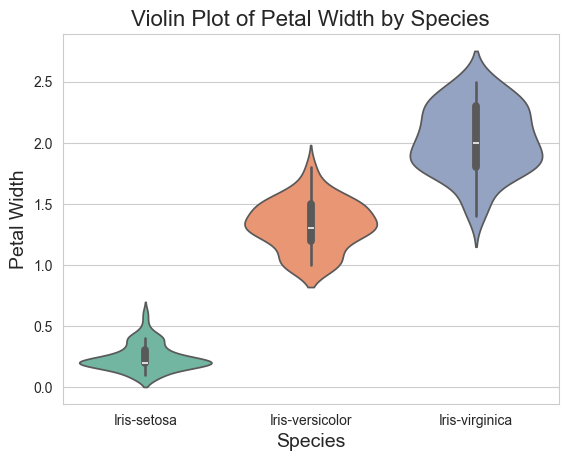

In [67]:
sns.violinplot(x="species", y="petal_width", data=iris, palette="Set2")
plt.title("Violin Plot of Petal Width by Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.show()

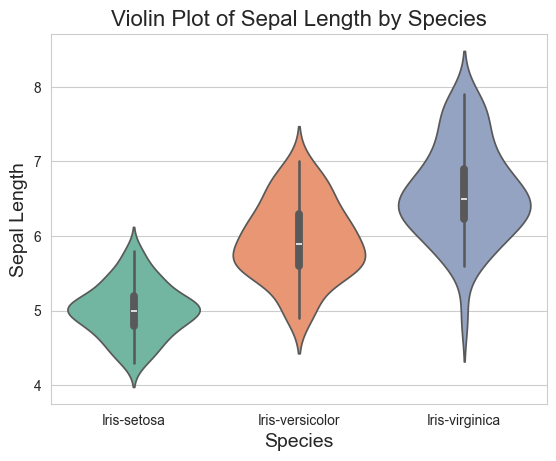

In [69]:
sns.violinplot(x="species", y="sepal_length", data=iris, palette='Set2')
plt.title("Violin Plot of Sepal Length by Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length", fontsize=14)
plt.show()

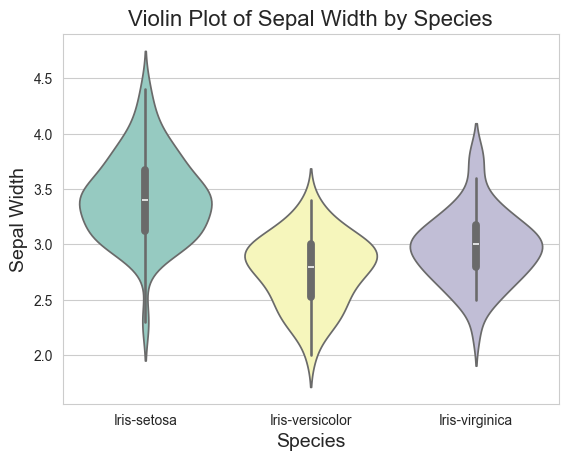

In [70]:
sns.violinplot(x="species", y="sepal_width", data=iris, palette='Set3')
plt.title("Violin Plot of Sepal Width by Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Width", fontsize=14)
plt.show()

In [71]:
#splitting of data
X_train, X_test, y_train,y_test = train_test_split(iris.iloc[:,:4],iris.species,stratify=iris.species,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [72]:
#random samples of training data
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
56,6.3,3.3,4.7,1.6
77,6.7,3.0,5.0,1.7
137,6.4,3.1,5.5,1.8


In [73]:
#training svc model
SVC = SVC()
SVC.fit(X_train,y_train)
y_predict = SVC.predict(X_test)
print("the accuracy of the Support Vector Machine Classifier model is :",accuracy_score(y_test,y_predict))
confusion_matrix(y_predict,y_test)

the accuracy of the Support Vector Machine Classifier model is : 0.9555555555555556


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

In [74]:
#training logistic regression
LG = LogisticRegression()
LG.fit(X_train,y_train)
y_predict = LG.predict(X_test)
print("the accuracy of the Logistic Regresssion Classifier model is :",accuracy_score(y_predict,y_test))
confusion_matrix(y_predict,y_test)

the accuracy of the Logistic Regresssion Classifier model is : 0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]], dtype=int64)

In [76]:
#training decision tree classifier model
DTC = DecisionTreeClassifier(max_leaf_nodes = 3)
DTC.fit(X_train,y_train)
y_predict = DTC.predict(X_test)
print("the accuracy of the Decision Tree Classifier model is :",accuracy_score(y_test,y_predict))
confusion_matrix(y_predict,y_test)

the accuracy of the Decision Tree Classifier model is : 0.9777777777777777


array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]], dtype=int64)

In [77]:
#training extra tree classfier model
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
ETC_prediction=ETC.predict(X_test)
print('The accuracy of the Extra Trees Classifier model is',accuracy_score(ETC_prediction,y_test))
confusion_matrix(ETC_prediction,y_test)

The accuracy of the Extra Trees Classifier model is 0.9555555555555556


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

In [78]:
#training KNN model
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
KNN_prediction=KNN.predict(X_test)
print('The accuracy of the KNeighborsClassifier model is',accuracy_score(KNN_prediction,y_test))
confusion_matrix(KNN_prediction,y_test)

The accuracy of the KNeighborsClassifier model is 0.9555555555555556


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

In [79]:
#training gaussian naive bayes model
GNB=GaussianNB()
GNB.fit(X_train,y_train)
GNB_prediction=GNB.predict(X_test)
print('The accuracy of the GaussionNB model is',accuracy_score(GNB_prediction,y_test))
confusion_matrix(GNB_prediction,y_test)

The accuracy of the GaussionNB model is 0.9777777777777777


array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]], dtype=int64)

In [80]:
#training random forest classfier model
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_prediction=RFC.predict(X_test)
print('The accuracy of the RandomForestClassifier model is',accuracy_score(RFC_prediction,y_test))
confusion_matrix(RFC_prediction,y_test)

The accuracy of the RandomForestClassifier model is 0.9555555555555556


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

In [81]:
#training XGboost model
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGB_prediction = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, XGB_prediction))
cm = confusion_matrix(y_test, XGB_prediction)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9333333333333333
Confusion Matrix:
 [[ 7  0  0]
 [ 0  9  2]
 [ 0  0 12]]


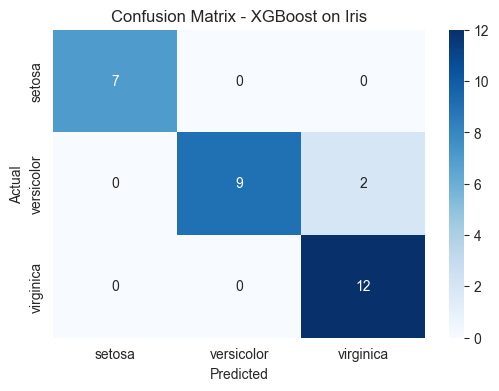

In [82]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost on Iris')
plt.show()

In [83]:
from sklearn.neural_network import MLPClassifier
# Scale features
X = StandardScaler().fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


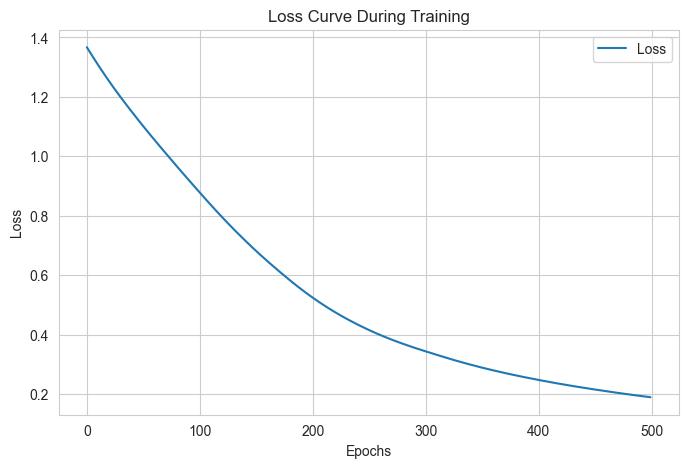

In [84]:
# ✅ Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(model.loss_curve_, label="Loss")
plt.title("Loss Curve During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()